In [1]:
import numpy as np 
import pandas as pd 

from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn import preprocessing
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, TruncatedSVD, PCA 

from gensim import corpora, models, similarities, matutils

import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

In [2]:
path = r'C:\Users\nesha\Desktop\movies_preprocessed1.csv' # data path
data = pd.read_csv(path)
    
data.shape

(38145, 3)

In [3]:
#creating a pipeline
def extract_topics(corpus, preprocessor, vectorizer, topic_modeler, print_n_words):
   
    
    if preprocessor is not None:
        corpus = corpus.apply(preprocessor)
    
   
    doc_word_vectors = vectorizer.fit_transform(corpus)  #vectorizing text into a document-word matrix
    
   
    doc_topic_vectors = topic_modeler.fit_transform(doc_word_vectors) #fitting topic modeller
    
    
    vocab = vectorizer.get_feature_names() #extracting topics
    for idx, topic in enumerate(topic_modeler.components_):
       
        top_words = [vocab[i].upper() for i in topic.argsort()[:-print_n_words-1:-1]]  #selecting the top n words for each topic
        print(f"Topic {idx}:\n", ", ".join(top_words), "\n")
    
    return doc_topic_vectors

In [4]:
#Topic Modeling (10 topics, 10 words each, no stop words listed)

corpus = data['overview_lemm']
preprocessor = None
vectorizer = TfidfVectorizer()
topic_modeler = NMF(10, random_state=10, max_iter=1000)
print_n_words=10

extract_topics(corpus, preprocessor, vectorizer, topic_modeler, print_n_words);

Topic 0:
 IT, ONE, THAT, UP, WHEN, WORLD, FIND, TOWN, OUT, MURDER 

Topic 1:
 HE, HIM, WHEN, HIMSELF, CAN, WIFE, GET, NOT, MAN, JOB 

Topic 2:
 SHE, HER, WHEN, HUSBAND, HERSELF, LOVE, CAN, NOT, WOMAN, MOTHER 

Topic 3:
 FILM, DIRECT, DOCUMENTARY, STAR, STORY, MOVIE, DIRECTOR, FEATURE, BASE, FIRST 

Topic 4:
 WHO, YOUNG, WOMAN, MAN, LOVE, STORY, TWO, HIM, FALL, TRUE 

Topic 5:
 LIFE, YEAR, OLD, CHANGE, DAY, LIVE, WORLD, STORY, TIME, THAT 

Topic 6:
 THEY, THEM, TWO, HAVE, OTHER, GET, FIND, TOGETHER, WHEN, GO 

Topic 7:
 FAMILY, FATHER, SON, MOTHER, DAUGHTER, HOME, BROTHER, CHILD, WIFE, HOUSE 

Topic 8:
 SCHOOL, FRIEND, GIRL, HIGH, STUDENT, BEST, TEACHER, BOY, NEW, COLLEGE 

Topic 9:
 BE, HAVE, NOT, WILL, WHO, THERE, MAY, WHAT, CHILD, WOULD 



In [5]:
#Topic Modeling (10 topics, 10 words each)

my_stop_words = text.ENGLISH_STOP_WORDS.union(['this', 'when', 'each','film', 'by', 'as', 'live', 'make', 'ago', 'spend'])
corpus = data['overview_lemm']
preprocessor = None
vectorizer = TfidfVectorizer(stop_words=my_stop_words)
topic_modeler = NMF(10, random_state=10, max_iter=1000)
print_n_words=10

topics_10 = extract_topics(corpus, preprocessor, vectorizer, topic_modeler, print_n_words);
topics_10

Topic 0:
 WORLD, TIME, GROUP, NEW, PEOPLE, WAR, WAY, FORCE, STAR, MOVIE 

Topic 1:
 FAMILY, FATHER, SON, MOTHER, CHILD, HOME, DAUGHTER, BROTHER, WIFE, HOUSE 

Topic 2:
 LOVE, FALL, MARRY, MEET, RELATIONSHIP, BEAUTIFUL, AFFAIR, MARRIAGE, DAUGHTER, ROMANTIC 

Topic 3:
 MURDER, POLICE, KILLER, KILL, CRIME, WIFE, DETECTIVE, CASE, GANG, COP 

Topic 4:
 SCHOOL, FRIEND, GIRL, HIGH, STUDENT, BEST, TEACHER, BOY, COLLEGE, NEW 

Topic 5:
 YEAR, OLD, BOY, LATER, MOTHER, RETURN, AGE, PARENT, TIME, SUMMER 

Topic 6:
 LIFE, CHANGE, DAY, FOREVER, REAL, GOOD, WORK, DREAM, DEATH, TIME 

Topic 7:
 WOMAN, YOUNG, MAN, HUSBAND, MEN, BEAUTIFUL, LOVER, GIRL, AFFAIR, MYSTERIOUS 

Topic 8:
 TOWN, SMALL, LOCAL, SHERIFF, VILLAGE, BIG, COMMUNITY, CITY, PEOPLE, GANG 

Topic 9:
 STORY, TRUE, BASED, BASE, TELL, MOVIE, SET, NOVEL, TALE, CHARACTER 



array([[0.01017854, 0.00469343, 0.00577072, ..., 0.00108239, 0.00054563,
        0.0007886 ],
       [0.02524712, 0.00016995, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00694844, 0.02637003, 0.00184523, ..., 0.        , 0.01134184,
        0.        ],
       ...,
       [0.00380062, 0.        , 0.00082927, ..., 0.00033608, 0.00029151,
        0.        ],
       [0.00141529, 0.01413404, 0.00483203, ..., 0.00267628, 0.03184669,
        0.        ],
       [0.005088  , 0.        , 0.0044636 , ..., 0.02504082, 0.        ,
        0.00644412]])

In [6]:
#Topic Modeling (15 topics, 15 words each)

my_stop_words = text.ENGLISH_STOP_WORDS.union(['this', 'when', 'each','film', 'by', 'as', 'live', 'make', 'ago', 'spend'])
corpus = data['overview_lemm']
preprocessor = None
vectorizer = TfidfVectorizer(stop_words=my_stop_words)
topic_modeler = NMF(15, random_state=10, max_iter=1000) 
print_n_words= 15

topics_15 = extract_topics(corpus, preprocessor, vectorizer, topic_modeler,print_n_words);
topics_15

Topic 0:
 WORLD, TIME, GROUP, NEW, PEOPLE, WAR, WAY, FORCE, DOCUMENTARY, TEAM, STAR, MOVIE, FIGHT, AMERICAN, SAVE 

Topic 1:
 FATHER, SON, MOTHER, BOY, DAUGHTER, DEATH, YOUNG, GIRL, SISTER, TEENAGE, LITTLE, AWAY, MARRY, CARE, HELP 

Topic 2:
 LOVE, FALL, MARRY, MEET, RELATIONSHIP, BEAUTIFUL, GIRL, AFFAIR, ROMANTIC, MARRIAGE, TRIANGLE, HEART, TRUE, ROMANCE, LOVER 

Topic 3:
 BROTHER, SISTER, TWIN, KILL, GANG, LAW, PARENT, REVENGE, YOUNG, HOME, DEATH, RETURN, GIRLFRIEND, LITTLE, DRUG 

Topic 4:
 SCHOOL, HIGH, GIRL, STUDENT, TEACHER, COLLEGE, NEW, BOY, CLASS, PARENT, POPULAR, TEENAGE, SENIOR, KID, DAY 

Topic 5:
 YEAR, OLD, LATER, BOY, PARENT, RETURN, AGE, SUMMER, TIME, DAY, PAST, PRISON, HOUSE, HOME, SEVEN 

Topic 6:
 LIFE, CHANGE, DAY, REAL, FOREVER, GOOD, DREAM, WORK, TIME, DEATH, NEW, CAREER, TURN, START, PERSONAL 

Topic 7:
 WOMAN, YOUNG, MEN, BEAUTIFUL, GIRL, HUSBAND, MYSTERIOUS, LOVER, BOYFRIEND, SEXUAL, MARRIED, RELATIONSHIP, SEARCH, APARTMENT, COUPLE 

Topic 8:
 TOWN, SMALL, LOCA

array([[0.00763962, 0.00242311, 0.00470861, ..., 0.00660017, 0.00327524,
        0.00112356],
       [0.02038624, 0.00044733, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00506692, 0.0019594 , 0.00166954, ..., 0.00464129, 0.00487474,
        0.        ],
       ...,
       [0.0034458 , 0.        , 0.00083821, ..., 0.00115144, 0.        ,
        0.        ],
       [0.        , 0.        , 0.00196557, ..., 0.0198529 , 0.00208093,
        0.        ],
       [0.00401242, 0.        , 0.00360104, ..., 0.        , 0.00271144,
        0.00789869]])

In [7]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(['this', 'when', 'each','film', 'by', 'as', 'live', 'make', 'ago', 'spend'])
corpus = data['overview_lemm']
preprocessor = None
vectorizer = TfidfVectorizer(stop_words=my_stop_words)
topic_modeler = TruncatedSVD(15, random_state=10) 
print_n_words= 15

extract_topics(corpus, preprocessor, vectorizer, topic_modeler, print_n_words);

Topic 0:
 LIFE, YOUNG, YEAR, LOVE, FAMILY, MAN, WOMAN, OLD, STORY, FRIEND, FATHER, GIRL, TIME, NEW, WORLD 

Topic 1:
 FAMILY, OLD, FATHER, YEAR, MOTHER, SON, DAUGHTER, GIRL, HOME, CHILD, BOY, BROTHER, SISTER, HOUSE, PARENT 

Topic 2:
 WOMAN, YOUNG, LOVE, MAN, STORY, HUSBAND, FALL, WIFE, BEAUTIFUL, AFFAIR, MARRY, LOVER, RELATIONSHIP, MARRIAGE, DAUGHTER 

Topic 3:
 LIFE, STORY, LOVE, YEAR, OLD, DOCUMENTARY, TRUE, CHANGE, WORLD, SCHOOL, RELATIONSHIP, MOVIE, MUSIC, FAMILY, DAY 

Topic 4:
 FAMILY, LIFE, STORY, SON, FATHER, WIFE, CHILD, HOME, WAR, DOCUMENTARY, BROTHER, DEATH, DAUGHTER, MURDER, AMERICAN 

Topic 5:
 YEAR, OLD, MAN, WOMAN, LIFE, MURDER, WORLD, PRISON, DOCUMENTARY, YOUNG, LATER, PAST, RELEASE, KILLER, CASE 

Topic 6:
 LIFE, FRIEND, WIFE, DAY, CHANGE, JOB, NEW, BEST, HUSBAND, WORK, START, MONEY, GOOD, NIGHT, GIRLFRIEND 

Topic 7:
 LOVE, WIFE, FRIEND, MURDER, FALL, DAUGHTER, HUSBAND, YEAR, MARRY, BEST, POLICE, TIME, EX, HELP, MAN 

Topic 8:
 TOWN, SMALL, LOVE, STORY, LOCAL, YEAR, 

NMF is working much better than LSA(TruncatedSVD) since there are many repetitive words in different topics when using TruncatedSVD!



In [29]:
#Topic Modeling (20 topics, 15 words each)

my_stop_words = text.ENGLISH_STOP_WORDS.union(['story','this', 'when', 'each','film', 'by', 'as', 'live', 'make',
                                               'ago','later','earlier', 'spend','tell','say','base','based',
                                              'know', 'want', 'try','just', 'begin', 'special',
                                              'soon','look','come', 'decide', 's','kill', 'turn','way', 'new', 'time'])
corpus = data['overview_lemm']
preprocessor = None
vectorizer = TfidfVectorizer(stop_words=my_stop_words)
topic_modeler = NMF(20, random_state=10, max_iter=1000) 
print_n_words= 15

topics_20 = extract_topics(corpus, preprocessor, vectorizer, topic_modeler,print_n_words);
topics_20

Topic 0:
 GROUP, WAR, FORCE, FIGHT, TEAM, SOLDIER, MEN, MISSION, BATTLE, HELP, SAVE, PEOPLE, GANG, ORDER, SECRET 

Topic 1:
 FATHER, SON, BOY, DEATH, DAUGHTER, MARRY, SEARCH, TEENAGE, BUSINESS, MONEY, ESTRANGED, AWAY, HELP, DIE, RICH 

Topic 2:
 WOMAN, HUSBAND, MEN, BEAUTIFUL, RELATIONSHIP, MYSTERIOUS, LOVER, BOYFRIEND, PAST, MARRIED, SEXUAL, SEARCH, MARRIAGE, SEX, AFFAIR 

Topic 3:
 LOVE, FALL, MARRY, MEET, RELATIONSHIP, TRUE, BEAUTIFUL, AFFAIR, ROMANTIC, MARRIAGE, TRIANGLE, HEART, LOVER, ROMANCE, SET 

Topic 4:
 SCHOOL, HIGH, STUDENT, TEACHER, COLLEGE, CLASS, SENIOR, KID, POPULAR, GRADUATE, GROUP, CLASSMATE, PARENT, BULLY, BOY 

Topic 5:
 YEAR, OLD, BOY, AGE, RETURN, SUMMER, PARENT, PAST, PRISON, SEVEN, DAUGHTER, PLACE, THIRTY, RELEASE, HOUSE 

Topic 6:
 LIFE, CHANGE, REAL, GOOD, FOREVER, DEATH, START, DREAM, WORK, PEOPLE, STRUGGLE, PERSONAL, PAST, DIFFERENT, EXPERIENCE 

Topic 7:
 WIFE, HUSBAND, DAUGHTER, AFFAIR, MARRIAGE, EX, COUPLE, LOVER, MARRY, SON, HOUSE, JOB, HOME, LEAVE, RETU

array([[0.00388789, 0.00175463, 0.00071786, ..., 0.00109933, 0.00711865,
        0.00388664],
       [0.00808058, 0.        , 0.00013955, ..., 0.00070103, 0.00235565,
        0.00464054],
       [0.0021223 , 0.00138678, 0.00092559, ..., 0.00020899, 0.00664369,
        0.00068454],
       ...,
       [0.00275072, 0.        , 0.00046838, ..., 0.        , 0.00254865,
        0.        ],
       [0.        , 0.        , 0.00132484, ..., 0.00026191, 0.00929306,
        0.00182791],
       [0.00240322, 0.        , 0.05154691, ..., 0.        , 0.        ,
        0.00124543]])

In [30]:
from wordcloud import WordCloud

In [31]:
#creating a function to plot the wordcloud
def wc_topic(topics, index, docs):
    words = ""
    
    for i, doc in enumerate(topics):
        main_topic = np.argsort(-doc)[0]
        if main_topic == index:
            words += docs[i]
            
    wordcloud = WordCloud(stopwords=my_stop_words, max_font_size=80, max_words=1000, colormap='Dark2',background_color="white").generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.figure(figsize=(10,6))
    plt.show()

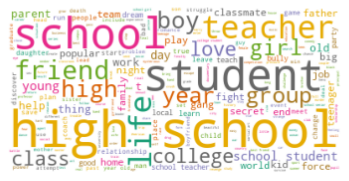

<Figure size 720x432 with 0 Axes>

In [35]:
wc_topic(topics_20, index=4, docs=data['overview_lemm'].str.replace("'", ''))

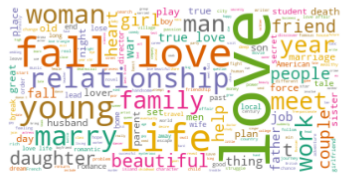

<Figure size 720x432 with 0 Axes>

In [33]:
wc_topic(topics_20, index=3, docs=data['overview_lemm'].str.replace("'", ''))

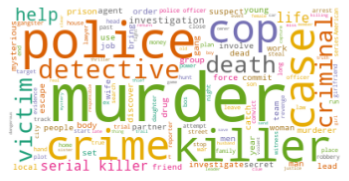

<Figure size 720x432 with 0 Axes>

In [34]:
wc_topic(topics_20, index=12, docs=data['overview_lemm'].str.replace("'", ''))